In [37]:
import acquire
import pandas as pd
import prepare
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud



Python, Java, C++

In [ ]:
# DATA ACQUISITION: lists of repos for 3 different languages were generated

# acquire.get_repo_list(query='machine learning language:python', sort_method='stars', how_many = 50)

# acquire.get_repo_list(query='machine learning language:c++', how_many = 50)

# acquire.get_repo_list(query='machine learning language:java', how_many = 50)

In [3]:
# Data was scraped using the acquire script from Zach
# scraped_data = acquire.scrape_github_data()

In [4]:
# Scrapped data saved to dataframe and json
# data = pd.DataFrame(scraped_data)

# data.to_json('data.json')

In [3]:
# Read data from json into Pandas Dataframe
data = pd.read_json('data.json')

In [5]:
prepared_data = prepare.prepare_df(data, 'readme_contents')

In [21]:
prepared_data['lem_length'] = prepared_data.lemmatized.str.len()

In [25]:
prepared_data.groupby('language').lem_length.median()

language
C++       4529.5
Java      3519.5
Python    8409.5
Name: lem_length, dtype: float64

In [29]:
def generate_category_words(df, categorical = 'language'):
    """ Joins all words in each news article per category. Outputs dataframe with all_words by category."""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized)
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized)
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [30]:
all_words_df=generate_category_words(prepared_data)

In [31]:
def generate_word_count_df(all_words_df):
    
    
    all_words_df = pd.concat([all_words_df, all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    # Transpose and fill NaN with 0
    all_words_df = all_words_df.T.fillna(0)
    
    # Drop the all_words row
    all_words_df = all_words_df.drop(all_words_df.index[0])
        
    return all_words_df

In [32]:
word_counts = generate_word_count_df(all_words_df)

In [33]:
def plot_bigrams(df, category):
    """ Accepts all words dataframe and outputs plots of top 20 bigrams and wordcloud """
    # Generate bigrams
    bigrams = list(nltk.ngrams(all_words_df.T[category]['all_words'].split(),2))
    # Take top 20
    top_20_cat_bigrams = pd.Series(bigrams).value_counts().head(20)
    
    # Plot bar chart
    top_20_cat_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
    
    # Ensure only integer values for x axis
    plt.xticks(range(top_20_cat_bigrams.sort_values().max()+1))

    plt.title(f'20 Most frequently occuring {category} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_cat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    
    # Plot wordcloud
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_cat_bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    plt.show()

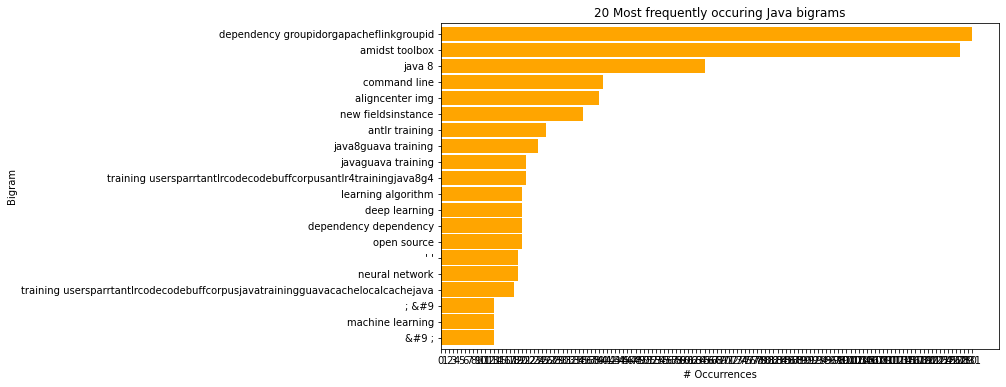

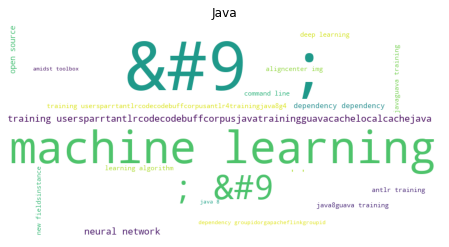

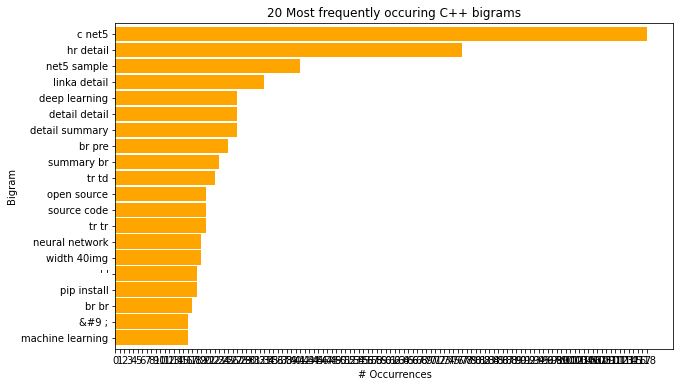

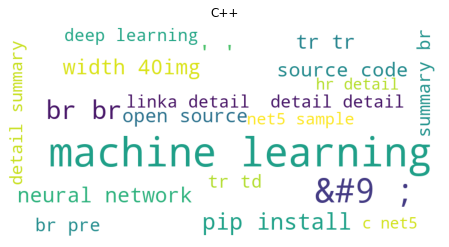

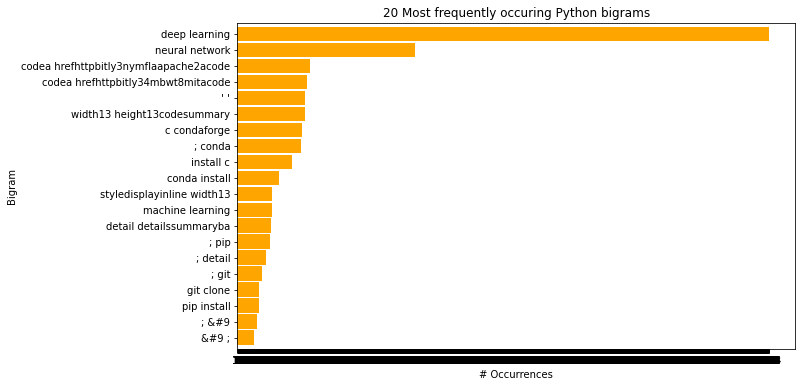

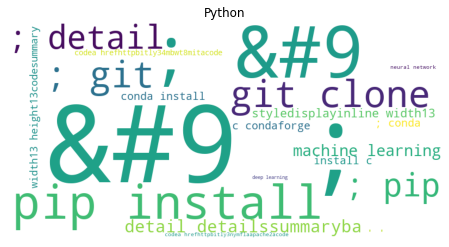

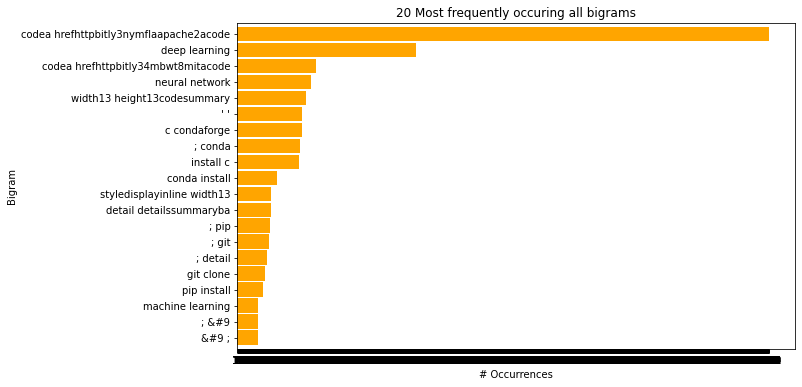

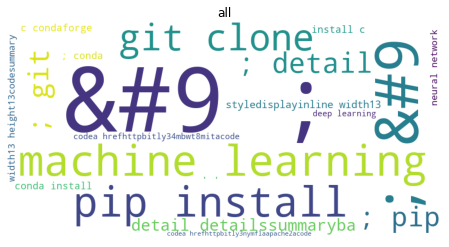

In [38]:
for col in word_counts.columns[:]:
    plot_bigrams(all_words_df, col)
    plt.show()